## Unsupervised Learning: PCA (BaskinRobbins dataset)
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('f-LSQI4rgtk', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbinsCluster.csv')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
40,Old Fashioned Butter Pecan,260,18.0,0.4,20,16,5.0,1
29,Love Potion #31,260,14.0,0.4,29,24,4.0,1
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,2
35,Maple Walnut,260,17.0,0.4,22,17,5.0,1
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
44,Perils of Praline,160,6.0,0.2,21,20,3.0,0
39,Nutty Coconut,280,19.0,0.4,23,17,6.0,1
27,Icing on the Cake,320,18.0,0.4,36,28,4.0,1
14,Chocolate Fudge,150,9.0,0.3,17,12,3.0,0
53,Reese® NHL® Power Play,330,21.0,0.4,30,23,8.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   cluster            70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [7]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

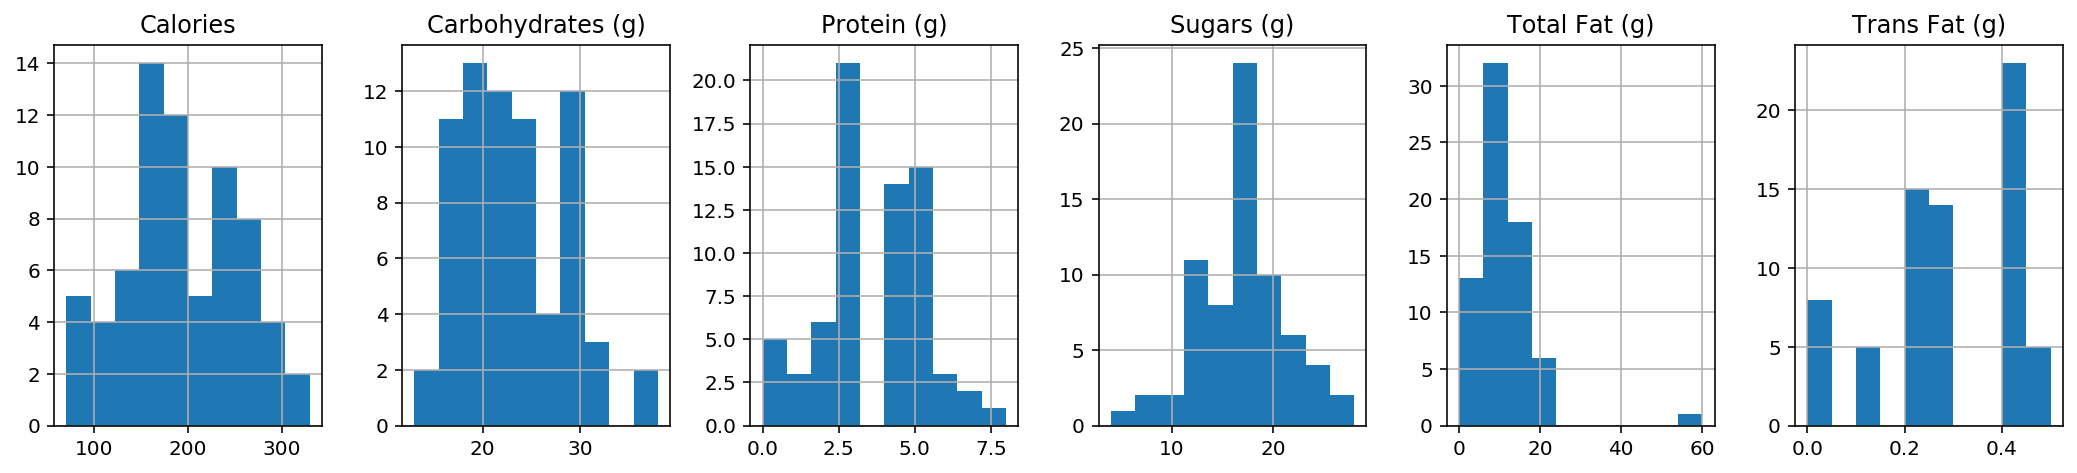

In [8]:
df[cols].hist(layout=(1, len(cols)), figsize=(3 * len(cols), 3.5));

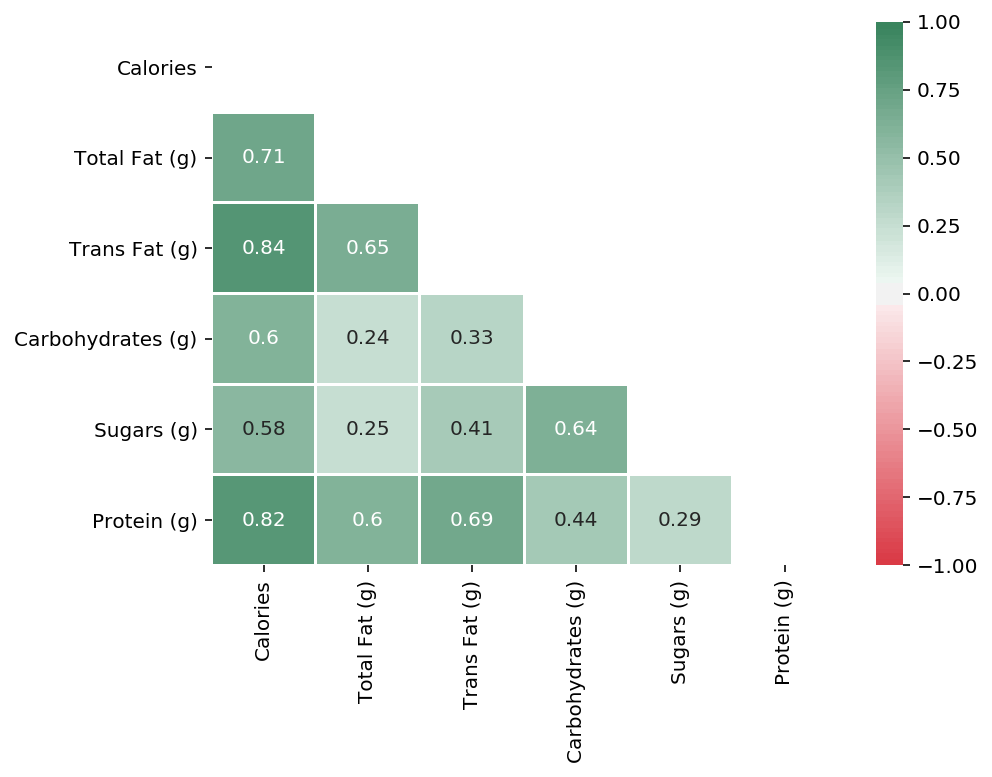

In [9]:
dcorr=df[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5)) 
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100), 
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

In [10]:
# sns.pairplot(df, vars=cols, 
#              hue='cluster',
#              plot_kws={'alpha': .4});

## PCA

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
X=df[cols]
scaler = StandardScaler()
X_t=scaler.fit_transform(X)

In [13]:
X_t[:5].round(4)

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [14]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

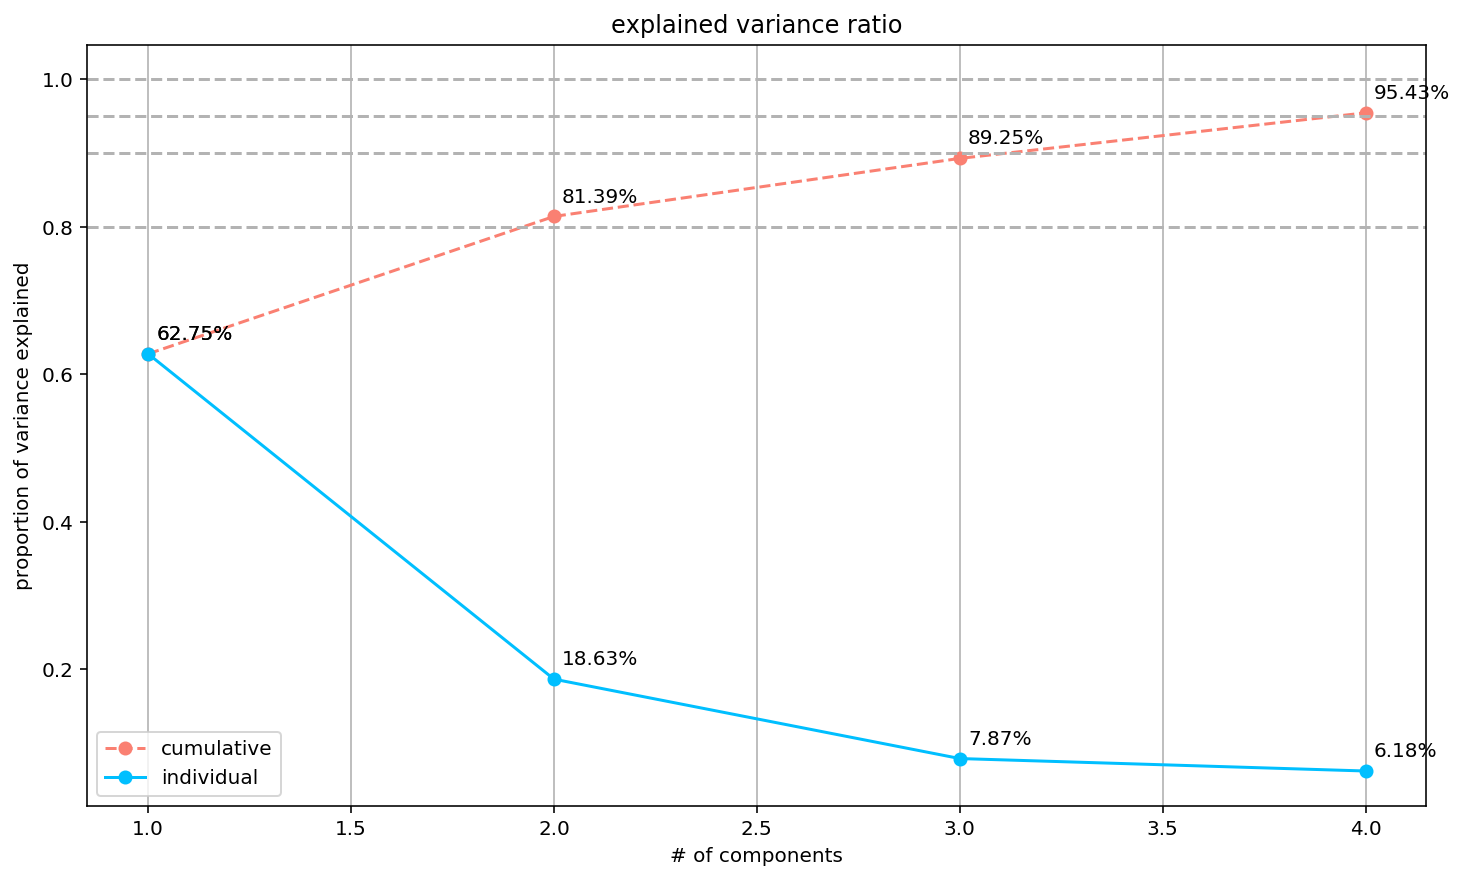

In [15]:
scree_plot(X, 4, True, True, figsize=(12, 7))

In [16]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

pca.fit_transform(X_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [3.81959142 1.13428279 0.47899446]
explained_variance_ratio (n_components=3) = [0.62750431 0.18634646 0.07869195]
sum explained_variance_ratio = 0.8925427102383179


In [17]:
pca.components_.round(4) # Eigenvectors

array([[-0.5028, -0.3847, -0.4397, -0.3386, -0.3263, -0.4299],
       [ 0.0436,  0.4067,  0.2583, -0.5848, -0.605 ,  0.2407],
       [ 0.0303, -0.3411, -0.2392,  0.4553, -0.5433,  0.5683]])

In [18]:
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [19]:
dpc=pd.DataFrame(pca.components_.T, 
                  index=cols,
                  columns=[f'PC{n+1}' for n in range(pca.n_components)]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3
Calories,-0.5028,0.0436,0.0303
Total Fat (g),-0.3847,0.4067,-0.3411
Trans Fat (g),-0.4397,0.2583,-0.2392
Carbohydrates (g),-0.3386,-0.5848,0.4553
Sugars (g),-0.3263,-0.6050,-0.5433
Protein (g),-0.4299,0.2407,0.5683


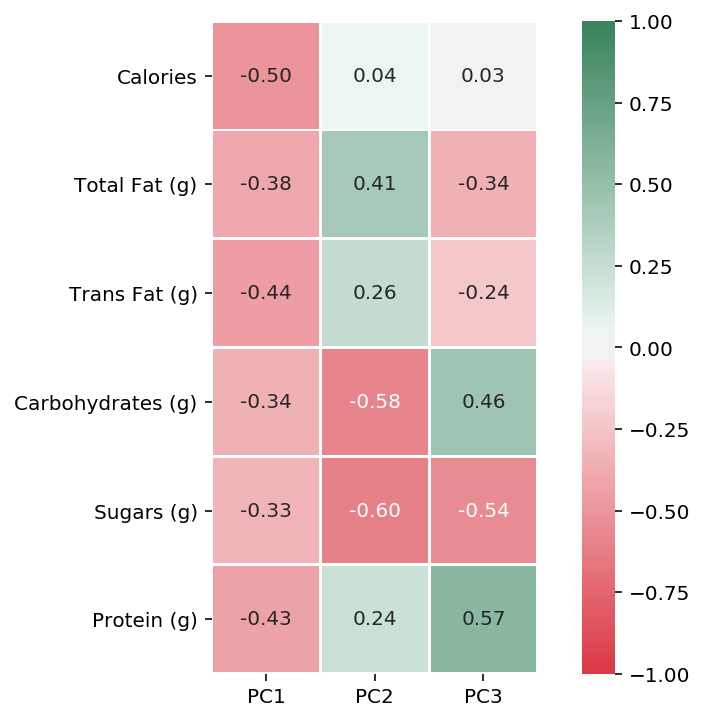

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dpc, cmap=sns.diverging_palette(10, 145, n=100), linewidths=1, 
            center=0, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax);

In [21]:
X_pca=pca.transform(X_t)[:5] # get reduced dimensions
X_pca

array([[ 1.27240098, -0.08152447, -0.44421778],
       [ 1.24760651,  0.6289527 ,  0.13436957],
       [ 0.59008376,  0.32761531, -0.10120799],
       [ 2.02998357, -0.02624934, -0.03718873],
       [ 1.44777299, -1.78114568, -0.01620903]])

In [22]:
pca.components_.T # new reduced dimensions

array([[-0.50276537,  0.0435505 ,  0.03027479],
       [-0.38473261,  0.4067255 , -0.34112831],
       [-0.43967032,  0.25831283, -0.23916284],
       [-0.33861501, -0.5848346 ,  0.45534023],
       [-0.32629083, -0.60495574, -0.54334945],
       [-0.42985112,  0.2407265 ,  0.56828927]])

In [23]:
X_t.shape

(70, 6)

In [24]:
pca.components_.T.shape

(6, 3)

In [25]:
np.dot(X_t, pca.components_.T)[:5] # pca.transform(X)

array([[ 1.27240098, -0.08152447, -0.44421778],
       [ 1.24760651,  0.6289527 ,  0.13436957],
       [ 0.59008376,  0.32761531, -0.10120799],
       [ 2.02998357, -0.02624934, -0.03718873],
       [ 1.44777299, -1.78114568, -0.01620903]])

In [26]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2


In [27]:
dd=pd.concat([df, pd.DataFrame(pca.transform(X), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              ], axis = 'columns')
dd.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,PC1,PC2,PC3
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,-96.460909,-10.620984,3.616899
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,-95.958005,-7.573830,5.018768
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,-102.359438,-9.492075,5.121581
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,-74.181403,-12.020507,2.996606
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2,-82.362439,-20.322514,5.337985


In [28]:
dd.cluster.unique().shape[0]

3

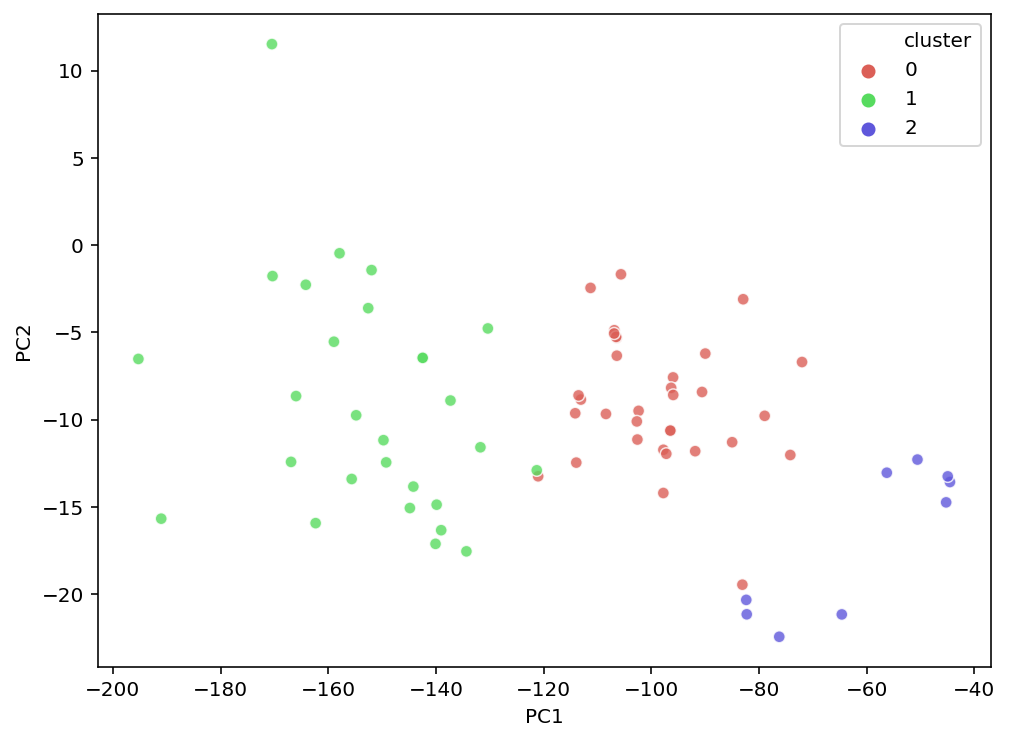

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=dd, x='PC1', y='PC2', hue='cluster', 
                alpha=.8, palette=sns.color_palette("hls", df.cluster.unique().shape[0]), ax=ax)

### biplot using yellowbrick package

/Users/prasert/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


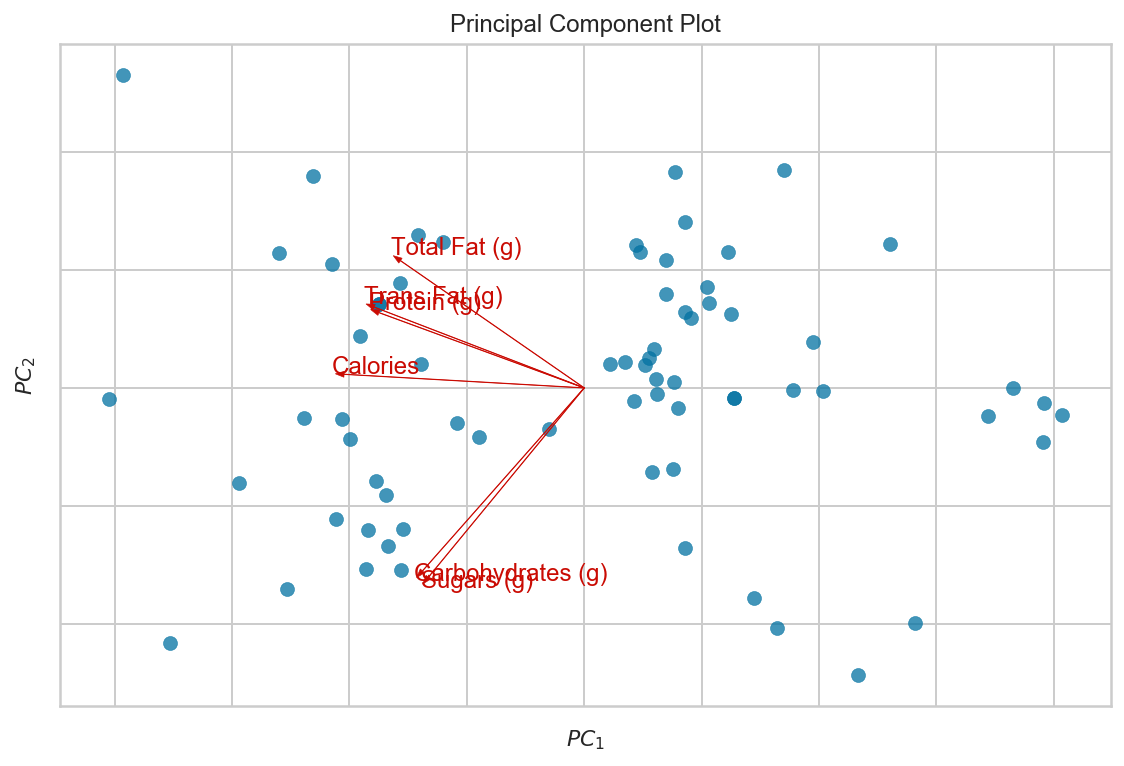

In [30]:
# pip install yellowbrick
import yellowbrick.features as yb
visualizer = yb.PCA(scale=True, proj_features=True, proj_dim=2)
visualizer.fit_transform(X)
visualizer.show()

### Plot 3 components

In [31]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [32]:
# pca = PCA(n_components=X.shape[1])
pca = PCA(n_components=3)

X_pca=pca.fit_transform(X)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [3851.57952859   37.9262722    16.86334204]
explained_variance_ratio (n_components=3) = [0.98358556 0.00968531 0.00430643]
sum explained_variance_ratio = 0.9975772900849742


In [33]:
# switch to interactive matplotlib
%matplotlib qt
%pylab qt

# switch back to inline mode
# %matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.8, 
           c=df.cluster.map({0: 'r', 1: 'g', 2: 'b'}))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');

Populating the interactive namespace from numpy and matplotlib
